In [5]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sklearn
from sklearn import metrics, preprocessing
import math
from decimal import Decimal


def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df

data = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
labels = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
df = extract_pixels(data, labels)
print(df['class'])
df1 = np.transpose(df)
X1 = df.to_numpy()
X1 = np.transpose(X1)
print(X1.shape)

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       0
21       3
22       3
23       3
24       0
25       0
26       0
27       0
28       0
29       0
        ..
20995    0
20996    0
20997    0
20998    0
20999    0
21000    0
21001    0
21002    0
21003    0
21004    0
21005    0
21006    0
21007    0
21008    0
21009    0
21010    0
21011    0
21012    0
21013    0
21014    0
21015    0
21016    0
21017    0
21018    0
21019    0
21020    0
21021    0
21022    0
21023    0
21024    0
Name: class, Length: 21025, dtype: uint8
(201, 21025)


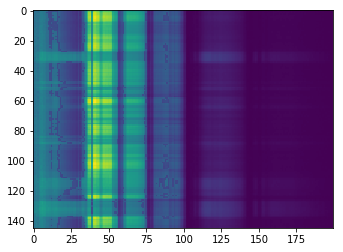

In [6]:
import matplotlib.pyplot as plt
#Visualize images
classes = data
index = 30
plt.imshow(classes[144])

In [7]:
def euclideanDistance(xi, xj):
    dist = 0
    for i in range(len(xi)):
        dist = dist + Decimal(float(pow(abs(xi[i]-xj[i]),2)))
        dist = Decimal(dist)
    ans = (math.sqrt(Decimal(abs(dist))))
    return ans
    



In [8]:
def makeDistanceMatrix(X1):
    distanceMatrix = []
    #for i in range(200):
    for i in range(200):
        distanceMatrix.append([0]*200)
        #distanceMatrix.append([0]*200)
    for i in range(200):
        for j in range(200):
            distanceMatrix[i][j] = np.linalg.norm(X1[i]-X1[j])
    return distanceMatrix
distanceMatrix = []
#for i in range(200):
for i in range(200):
    distanceMatrix.append([0]*200)
    #distanceMatrix.append([0]*200)
distanceMatrix = makeDistanceMatrix(X1)
print(distanceMatrix)

[[0.0, 9335230.348389374, 9311501.120150069, 9326402.69828866, 9276875.580643948, 9237213.8758197, 9228897.719900357, 9248290.09540434, 9254982.756958168, 9286919.38132382, 9255153.720370667, 9086021.503143607, 8761808.624070775, 9187721.691988498, 9232294.773514329, 9183661.059677182, 8892884.954811908, 8643551.997719456, 8528793.720916048, 8251547.42944734, 8166335.333091031, 8070989.037863079, 7936849.252078119, 7744950.681773255, 7646299.451483509, 7413925.348015651, 7227122.461821856, 7195290.656239955, 7133104.610727436, 6872498.652584516, 7444721.5640613455, 6817647.133701113, 7445697.348650091, 8439510.645332584, 8969728.681540819, 9255213.427701546, 9159407.511216488, 9068138.609906722, 9070473.096120676, 9033316.794945586, 9048004.013788953, 9030940.761001369, 9068143.7692031, 9077113.522645842, 9133514.263950486, 9182492.743877176, 9153435.762261622, 9097479.575387405, 9107278.677454533, 9106383.89265915, 9115398.367144575, 9111422.906203618, 9126487.325733159, 9175601.87548

In [9]:
k=9
#Finding KNN
#*******************
duplicated=[[0 for i in range(200+1)] for i in range(200+1)]
for i in range(0,200):
    for j in range(0,200):
        duplicated[i][j]=distanceMatrix[i][j]
    
def KNN(dist2):
    k=9
    #temp=[-1]*200
    temp=[-1]*200
    #knn=[[-1 for i in range(k+1)] for i in range(200+1)]
    knn=[[-1 for i in range(k+1)] for i in range(200+1)]
    #for i in range(0,200):
    for i in range(0,200):
        for j in range(0,200):
        #for j in range(0,200):
            temp[j]=j+1
       # for j in range(0,200):
        for j in range(0,200):
            for l in range(0, 200-j-1):
            #for l in range(0, 200-j-1): 
                if dist2[i][l] > dist2[i][l+1] :
                    t=temp[l]
                    temp[l]=temp[l+1]
                    temp[l+1]=t
                    tt=dist2[i][l]
                    dist2[i][l]=dist2[i][l+1]
                    dist2[i][l+1]=tt
        for j in range(0,k):
            knn[i][j]=temp[j]
    return knn
#*************************************************************
knn=[]
#for i in range(200):
for i in range(200):
    knn.append([0]*k)

knn=KNN(duplicated)
#print(knn[0][1])
print(knn)

        
        
        
        
        


[[1, 126, 125, 122, 79, 127, 123, 124, 128, -1], [2, 99, 98, 58, 81, 93, 100, 92, 82, -1], [3, 91, 87, 88, 89, 85, 90, 94, 86, -1], [4, 93, 82, 91, 87, 85, 92, 94, 86, -1], [5, 91, 87, 88, 89, 90, 85, 94, 86, -1], [6, 4, 2, 3, 30, 32, 91, 87, 88, -1], [7, 10, 4, 13, 11, 2, 12, 3, 33, -1], [8, 10, 13, 4, 31, 30, 32, 33, 91, -1], [9, 10, 13, 11, 12, 31, 33, 30, 32, -1], [10, 32, 30, 98, 91, 87, 85, 94, 86, -1], [11, 30, 32, 31, 99, 33, 81, 100, 58, -1], [12, 32, 30, 31, 33, 99, 81, 100, 118, -1], [13, 32, 30, 99, 81, 100, 118, 119, 117, -1], [14, 33, 31, 30, 32, 27, 24, 99, 26, -1], [15, 24, 33, 31, 27, 26, 30, 32, 25, -1], [16, 24, 26, 25, 33, 31, 27, 23, 28, -1], [17, 27, 33, 31, 30, 32, 26, 28, 29, -1], [18, 30, 32, 100, 81, 118, 119, 117, 126, -1], [19, 100, 118, 81, 119, 117, 126, 125, 122, -1], [20, 100, 81, 118, 119, 117, 126, 125, 122, -1], [21, 100, 81, 118, 119, 117, 126, 125, 122, -1], [22, 100, 81, 118, 119, 117, 126, 125, 122, -1], [23, 100, 81, 118, 119, 117, 126, 125, 122,

In [10]:
#SNN or intersection of KNN
k=9
def SNN(knn):
    #sn=[[0 for i in range(200+1)] for i in range(200+1)]
    sn=[[0 for i in range(200+1)] for i in range(200+1)]
    #for i in range(0,200):
    for i in range(0,200):
        #for m in range(0,200):
        for m in range(0,200):
            a=0
            for j in range(0,k):
                for l in range(0,k):
                    if(knn[i][j]==knn[m][l]):
                        a=a+1
            sn[i][m]=a
    return sn
        
            
snn=[]
#for i in range(0,200):
for i in range(0,200):
    snn.append([0]*200)
    #snn.append([0]*200)
snn=SNN(knn)
print(snn)

                        
                
            
    
    

[[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 1, 3, 5, 6, 6, 5, 4, 3, 3, 3, 5, 8, 5, 4, 4, 8, 8, 4, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 9, 0, 3, 0, 1, 1, 0, 0, 1, 4, 3, 3, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 4, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 1, 3, 4, 4, 0, 0, 0, 0, 2, 2, 2, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
#equation 5
k = 9
def density(knn, snn, distanceMat):
    dens = []
    #for i in range(200):
    for i in range(200):
        den = 0
        for j in range(k):
            t = knn[i][j] - 1
            #print(i, t)
            d = distanceMat[i][t]
            s = snn[i][knn[i][j]] + 1
            den += math.exp((d/s)*-1)
        dens.append(den)
    return dens

densit = []
densit = density(knn, snn, distanceMatrix)
print(densit)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [12]:
#equation 6
def distanceFactor(density, distanceMatrix):
    distanceFact = []
    maxDensity = -1
    maxDensityIndex = -1
    for i in range(k):
        if(density[i]>maxDensity):
            maxDensity = density[i]
            maxDensityIndex = i
    #distFacForMax = distanceMatrix[maxDensityIndex][199]
    distFacForMax = distanceMatrix[maxDensityIndex][19]
    #for i in range(200):
    for i in range(200):
        #for j in range(200):
        for j in range(200):
            if(i == maxDensityIndex):
                #print("Appending 1:",distFacForMax)
                distanceFact.append(distFacForMax)
                break
            if(i==j or (density[i]>density[j])):
                continue
            #print("Appending 2:",distanceMatrix[i][j])
            distanceFact.append(distanceMatrix[i][j])
            break
    return distanceFact

distanceFactors = []
distanceFactors = distanceFactor(densit, distanceMatrix)
print(distanceFactors)

[8251547.42944734, 300075.7415087064, 200971.13288231223, 217991.86132972947, 236382.09257894303, 276463.58050925983, 286244.4100799175, 268552.042632336, 263941.1515792867, 282810.4859300659, 859581.4354690311, 2010187.6377781255, 3175926.488767805, 1405844.0338743129, 997253.2674922654, 1390391.1438695947, 2734964.470783487, 3502432.903052391, 3811919.7462760154, 4406500.072712923, 4565710.169493789, 4733175.490732834, 4967100.356343629, 5266386.371223061, 5407040.098159159, 5726796.561487844, 5967461.910929469, 5995846.470317097, 6066607.909236677, 6387709.176937848, 5702583.674746737, 6447689.859408484, 5697236.990049036, 4007582.2179077, 2532299.54897441, 796108.0522360015, 412562.5663496387, 471300.15767555183, 467801.8881118374, 2319326.579703255, 491541.7570105311, 504247.4564378089, 471801.580591884, 471640.1010516387, 490061.29947487183, 710314.4221406461, 511616.32777111407, 451418.1048196893, 468941.6842742816, 460794.50340688747, 470282.8147891437, 460349.7968241107, 46918

In [13]:
#equation 7
def weight7(density, distanceFactor):
    weight7 = []
    for i in range(200):
    #for i in range(200):
        weight7.append(density[i]*distanceFactor[i])
    return weight7

weightage = []
weightage = weight7(densit, distanceFactors)
print(weightage)

[8251547.42944734, 300075.7415087064, 200971.13288231223, 217991.86132972947, 236382.09257894303, 276463.58050925983, 286244.4100799175, 268552.042632336, 263941.1515792867, 282810.4859300659, 859581.4354690311, 2010187.6377781255, 3175926.488767805, 1405844.0338743129, 997253.2674922654, 1390391.1438695947, 2734964.470783487, 3502432.903052391, 3811919.7462760154, 4406500.072712923, 4565710.169493789, 4733175.490732834, 4967100.356343629, 5266386.371223061, 5407040.098159159, 5726796.561487844, 5967461.910929469, 5995846.470317097, 6066607.909236677, 6387709.176937848, 5702583.674746737, 6447689.859408484, 5697236.990049036, 4007582.2179077, 2532299.54897441, 796108.0522360015, 412562.5663496387, 471300.15767555183, 467801.8881118374, 2319326.579703255, 491541.7570105311, 504247.4564378089, 471801.580591884, 471640.1010516387, 490061.29947487183, 710314.4221406461, 511616.32777111407, 451418.1048196893, 468941.6842742816, 460794.50340688747, 470282.8147891437, 460349.7968241107, 46918

In [14]:
# indexes of n bands descending order
#wght=[0]*200
wght=[0]*200
for i in range(0,200):
    wght[i]=weightage[i]

def index(weight):
    #ind=[0]*200
    ind=[0]*200
    #for i in range(0,200):
    for i in range(0,200):
        ind[i]=i+1
    for i in range(0,200):
    #for i in range(0,200):
        #for j in range(0,200-i-1):
        for j in range(0,200-i-1):
            if(weight[j]<weight[j+1]):
                t=weight[j]
                weight[j]=weight[j+1]
                weight[j+1]=t
                tt=ind[j]
                ind[j]=ind[j+1]
                ind[j+1]=tt
    return ind
indexes=[]
indexes=index(wght)
#top n==9 band as clustering centers
n=9
topindex=[]
topindex=indexes[0:(n)]
#topindex = [1,2,3,4,5,6,7,8,9]
#topindex = [*range(1, n+1, 1)]
print(topindex)

[81, 100, 126, 125, 119, 122, 127, 118, 117]


In [15]:
#CLUSTERING WITH TOP N BANDS
from collections import defaultdict
topind=set(topindex)                   #set of top indexes
def cluster(distancematrix):
    clust=defaultdict(list)
    #for i in range(1,201):
    for i in range(1,201):
        if(i in topind):
            clust[i].append(i)
    #for i in range(1,201):
    for i in range(1,201):
        if(i in topind):
            continue
        else:
            m=10**9
            #for j in range(0,200):
            for j in range(0,200):
                if((j+1) in topind):
                    if(m>distancematrix[i-1][j]):
                        m=distancematrix[i-1][j]
                        minband=j+1
            clust[minband].append(i)
    return clust
clusters=defaultdict(list)
clusters=cluster(distanceMatrix)
print(clusters)

                    
    


defaultdict(<class 'list'>, {81: [81, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 83, 85, 86, 87, 88, 89, 90, 91, 94, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], 100: [100, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 33, 34, 60, 99], 117: [117, 77, 78, 80, 101, 124, 128, 129, 130, 131, 132], 118: [118, 27, 28, 29, 30, 32], 119: [119], 122: [122], 125: [125], 126: [126, 1, 76, 82, 92, 93, 95, 96, 97, 98], 127: [127, 58, 59, 79, 84, 115, 116, 120, 121, 123]})


In [16]:
#Cluster to graph to array

ll=len(topind)
clst=[]
for i in topind:
    clst.append(clusters[i])
print(clst)
    
    

[[100, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 33, 34, 60, 99], [81, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 83, 85, 86, 87, 88, 89, 90, 91, 94, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], [117, 77, 78, 80, 101, 124, 128, 129, 130, 131, 132], [118, 27, 28, 29, 30, 32], [119], [122], [125], [126, 1, 76, 82, 92, 93, 95, 96, 97, 98], [127, 58, 59, 79, 84, 115, 116, 120, 121, 123]]


In [17]:
n = 9
def calcCoEff(Xi, Xj):
    if(len(Xi) == len(Xj)):
        r = np.corrcoef(Xi, Xj)
        return ((r[0][1]+r[1][0])/2)
    diff = abs(len(Xi) - len(Xj))
    if(len(Xi) < len(Xj)):
        for i in range(diff):
            Xi.append(0)
    else:
        for i in range(diff):
            Xj.append(0)
    r = np.corrcoef(Xi, Xj)
    return ((r[0][1]+r[1][0])/2)
    



def corrCoeffSame(clusters, X1):
    liFinal = []
    for i in range(n):
        li = []
        li = clusters[i]
        #print(li)
        count = len(li) # No. of bands in this cluster i
        count -= 1
        temp = 0
        lii=[0]
        #print(len(li))
        for j in range(len(li)):
            #print("ui")#band j in cluster i
            #lii= [0]
            for k in range(len(li)): #band k in cluster i
                if(k == j):
                    continue
                coEff = calcCoEff(X1[li[j]], X1[li[k]])
                temp =temp + abs(coEff)
            #print("Appending")
            if(count == 0):
                count = 1
                #print(temp)
            lii.append((temp/count))
            #lii.insert(len(lii), temp/count)
            #print(lii)
        if(len(li) == 0):
            liFinal.append([0.0])
            continue
        liFinal.append(lii[1:])
    return liFinal

liFinalSame = corrCoeffSame(clst, X1)
print(liFinalSame)

[[0.7149684690369347, 1.5567516312721075, 2.4040696711619476, 3.25669748358052, 4.114366173797406, 4.9753962671522824, 5.836409755644874, 6.699017384011112, 7.558524569438838, 8.41388385862167, 9.26667622474621, 10.115196136958488, 10.880378583562266, 11.14153203684445, 11.793941788361392], [0.37578453728140604, 1.0252367797043067, 1.7036850541620752, 2.405983536552446, 3.115966384296202, 3.8329200265830234, 4.5539436417590995, 5.280042246582642, 6.008155989987338, 6.734441080312192, 7.450605415234185, 8.162484232941921, 8.866469009719745, 9.568858735276951, 10.266074662739276, 10.958967587575877, 11.675798971286447, 12.070460386711298, 12.459498559560345, 13.036244302492165, 13.661064948294271, 14.271881243663321, 14.919982607600916, 15.570126871163524, 16.21906497259799, 16.869234836486324, 17.516663862840577, 18.158837431889435, 18.804230244205737, 19.45254902261557, 20.10032594646753, 20.748357157464948, 21.395648220867415, 22.041668590472188, 22.6858399581413, 23.30362017449624, 2

In [18]:
def corrCoeffDiff(clusters, X1):
    liFinal = []
    for i in range(n):
        li = []
        li = clusters[i]
        #count = 200 - len(li)  
        count = 200 - len(li)
        temp = 0
        li1=[0]
        for j in range(len(li)): #band j in cluster i
            #li1 = []
            #for k in range(200): #band k in cluster other than cluster i
            for k in range(200):
                if(k == li[j] or (k in li)):
                    continue
                coEff = calcCoEff(X1[li[j]], X1[k])
                temp  =temp +abs(coEff)
            if(count == 0):
                count = 1
            li1.append(temp/count)
        if(len(li) == 0):
            liFinal.append([0.0])
            continue
        liFinal.append(li1[1:])
    return liFinal

liFinalDiff = corrCoeffDiff(clst, X1)
print(liFinalDiff)

[[0.5998925730212266, 1.3009623693611465, 1.9962493355186222, 2.6952812239544737, 3.3999246815768793, 4.108540109829682, 4.818644048002369, 5.533568662372285, 6.249230761565936, 6.964859150668039, 7.681610274589122, 8.36729499098172, 8.95088362364154, 9.339785723232787, 9.89325136582486], [0.5019573729487437, 1.134687169339609, 1.7972459814889703, 2.4832297098941982, 3.1770686136320285, 3.8800424512882183, 4.586586292138644, 5.298769750406746, 6.01401913733387, 6.72902269953979, 7.433860671792471, 8.132779703052867, 8.847365664056026, 9.568509662916242, 10.28756742044451, 10.998591907703224, 11.70815647639261, 12.223305062079264, 12.513734585998355, 12.945611548357466, 13.421671694825001, 13.887774341509653, 14.387224725185643, 14.888565614585183, 15.388829514298841, 15.890445066069146, 16.38904445830663, 16.88169199161704, 17.378189586832654, 17.87825392488047, 18.378164975923365, 18.878602728747495, 19.378523660969883, 19.877768530399553, 20.37555292126617, 20.85007762946526, 21.3114

In [19]:
#Calculation of weight of each band H value required
def lastweight(liFinalSame,liFinalDiff):
    finalweight=[]
    for i in range(0,9):
        oneclust=[]
        s=0.0
        for j in range(0,len(liFinalSame[i])):
            if(liFinalDiff[i][j]!=0):
                s=liFinalSame[i][j]/liFinalDiff[i][j]
            oneclust.append(s)
            s=0.0
        finalweight.append(oneclust)
    return finalweight

finalweight=lastweight(liFinalSame,liFinalDiff)
print(finalweight)




            
            
            
            
        


    

[[1.1918275057751653, 1.1966154194272118, 1.2042932856067172, 1.2082959858275366, 1.210134505652981, 1.2109888510638236, 1.2112141294322067, 1.2106143056584375, 1.209512795706846, 1.2080479556883281, 1.2063455308843913, 1.208896799725677, 1.2155647465714383, 1.1929108832903743, 1.1921198959021964], [0.7486383456703972, 0.9035413525482952, 0.9479420578537712, 0.9688928603608551, 0.9807677337928267, 0.9878551780562221, 0.9928830183713115, 0.9964656883189412, 0.9990250866828583, 1.0008052255155526, 1.002252496270915, 1.0036524449171915, 1.002159212853757, 1.000036481372022, 0.9979108027362696, 0.9963973279070756, 0.9972363279247757, 0.9874956343974315, 0.995665880072389, 1.0070010407616625, 1.0178363216529558, 1.0276579164312598, 1.037029927077086, 1.045777496249247, 1.053950526745892, 1.0615961205836322, 1.0688032427639444, 1.0756526917388725, 1.082059218553674, 1.0880564234264631, 1.093706905602399, 1.0990409330384538, 1.1040907241019708, 1.1088603107920958, 1.1133852438656455, 1.117675

In [20]:
#Representing band of each cluster of band

def representband(clusters,finalweight):
    finalband=[]
    indexs=0
    for i in range(0,9):
        maxi=0
        for j in range(0,len(finalweight[i])):
            if(maxi<finalweight[i][j]):
                maxi=finalweight[i][j]
                indexs=j
        finalband.append(clusters[i][indexs])
        indexs=0
    return finalband


finalband=representband(clst,finalweight)
print(finalband)

                

[34, 75, 101, 32, 119, 122, 125, 98, 84]
